# Data dictionary


Codebook: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

1. Diabetes_012 -> 0 = no diabetes; 1 = prediabetes; 2 = diabetes

2. HighBP -> 0 = low BP; 1 = high BP

3. HighChol -> 0 = no high cholesterol; 1 = high cholesterol

4. CholCheck -> 0 = no cholesterol check in 5 years; 1 = yes cholesterol check in 5 years

5. BMI -> Body Mass Index

6. Smoker (Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]) -> 0 = no; 1 = yes

7. Stroke (Ever told you had a stroke) -> 0 = no; 1 = yes

8. HeartDiseaseorAttack / coronary heart disease (CHD) or myocardial infarction (MI) -> 0 = no; 1 = yes

9. PhysActivity (physical activity in past 30 days - not including job) -> 0 = no; 1 = yes

10. Fruits (Consume Fruit 1 or more times per day) -> 0 = no; 1 = yes

11. Veggies (Consume Vegetables 1 or more times per day) -> 0 = no; 1 = yes

12. HvyAlcoholConsump, Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) -> 0 = no; 1 = yes

13. AnyHealthcare,Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. -> 0 = no; 1 = yes

14. NoDocbcCost, Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? -> 0 = no; 1 = yes

15. GenHlth, Would you say that in general your health is: scale 1-5 -> 1 = excellent; 2 = very good; 3 = good; 4 = fair; 5 = poor

16. MentHlth -> ow thinking about your mental health, which includes stress, depression, and problems with emotions, for how many
days during the past 30 days was your mental health not good?

17. PhysHlth -> Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

18. DiffWalk, Do you have serious difficulty walking or climbing stairs? -> 0 = no; 1 = yes

19. Sex -> 0 = female; 1 = male

20. Age, 13 levels of age -> Level 1 = 18-24; Level 9 = 60-64 ; Level 13 = 80 or older, etc (see codebook)

21. Education, Education level (EDUCA see codebook) scale 1-6 -> 1 = Never attended school or only kindergarten; 2 = Grades 1 through 8, etc (see codebook)

22. Income (Income scale (INCOME2 see codebook) scale 1-8) -> 1 = less than $10,000; 5 = less than $35,000; 8 = $75,000 or more, etc (see codebook)

# Import libraries & read data

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [62]:
data = pd.read_csv('diabetes.csv')

In [63]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [64]:
data.shape

(253680, 22)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

from the data information we can see that there are no nulls and all columns are in float data type, so we don't need feature encoding later on.

## Descriptive statistics

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


Here are some insights we can get:

1. 75% of the patients do not have diabetes or prediabetes

2. Less than 75% patients are smokers, have high blood pressure, high cholesterol, but had their cholesterol checked within the last 5 years

3. Almost all of the patients are active

4. There are patients with 30 days of physical injuries that leads to poor health condition & walk or climb difficulties

# Change datatype from float to integer, except BMI

I do this because all columns except BMI are originally in days or categories but encoded to numbers, while BMI can be in decimals.

In [67]:
intcols = data.loc[:, data.columns != 'BMI'].columns

for cols in intcols:
    data[cols] = data[cols].astype('int')

In [68]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


# Exploratory data analysis

## Assign numeric values to its original categories for EDA purpose

In [69]:
eda = data.copy()

In [70]:
eda['Diabetes_012'] = eda['Diabetes_012'].replace({0:"No Diabetes", 1:"prediabetes", 2:"diabetes"})
eda['HighBP'] = eda['HighBP'].replace({0:"Low BP", 1:"High BP"})
eda['HighChol'] = eda['HighChol'].replace({0:"Low Chol", 1:"High Chol"})
eda['CholCheck'] = eda['CholCheck'].replace({0:"No chol check", 1:"Chol check"})
eda['Smoker'] = eda['Smoker'].replace({0:"No", 1:"Yes"})
eda['Stroke'] = eda['Stroke'].replace({0:"No", 1:"Yes"})
eda['HeartDiseaseorAttack'] = eda['HeartDiseaseorAttack'].replace({0:"No", 1:"Yes"})
eda['PhysActivity'] = eda['PhysActivity'].replace({0:"No", 1:"Yes"})
eda['Fruits'] = eda['Fruits'].replace({0:"No", 1:"Yes"})
eda['Veggies'] = eda['Veggies'].replace({0:"No", 1:"Yes"})
eda['HvyAlcoholConsump'] = eda['HvyAlcoholConsump'].replace({0:"No", 1:"Yes"})
eda['AnyHealthcare'] = eda['AnyHealthcare'].replace({0:"No", 1:"Yes"})
eda['NoDocbcCost'] = eda['NoDocbcCost'].replace({0:"No", 1:"Yes"})
eda['GenHlth'] = eda['GenHlth'].replace({1:"excellent", 2:"very good", 3:"good", 4:"fair", 5:"poor"})
eda['DiffWalk'] = eda['DiffWalk'].replace({0:"No", 1:"Yes"})

eda['Sex'] = eda['Sex'].replace({0:"Female", 1:"Male"})

eda['Age'] = eda['Age'].replace({1:"Age 18-24",
                                                         2:"Age 25-29",
                                                         3:"Age 30-34",
                                                         4:"Age 35-39",
                                                         5:"Age 40-44",
                                                         6:"Age 45-49",
                                                         7:"Age 50-54",
                                                         8:"Age 55-59",
                                                         9:"Age 60-64",
                                                         10:"Age 65-69",
                                                         11:"Age 70-74",
                                                         12:"Age 75-79",
                                                         13:"80 or older",
                                                         14:"Don't know/refused/missing"})

eda['Education'] = eda['Education'].replace({1:"Never attended school or only kindergarten",
                                                         2:"Grades 1 through 8 (Elementary)",
                                                         3:"Grades 9 through 11 (Some high school)",
                                                         4:"Grade 12 or GED (High school graduate) ",
                                                         5:"College 1 year to 3 years (Some college or technical school)",
                                                         6:"College 4 years or more (College graduate)",
                                                         9:"Refused"})

eda['Income'] = eda['Income'].replace({1:"< $10,000",
                                                         2:"< $15,000",
                                                         3:"< $20,000",
                                                         4:"< $25,000",
                                                         5:"< 35,000",
                                                         6:"< 50,000",
                                                         7:"< $75,000",
                                                         8:"$75,000 or more",
                                                         77:"Don't know / not sure",
                                                         99:"Refused"})

In [71]:
eda.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,No Diabetes,High BP,High Chol,Chol check,40,Yes,No,No,No,No,...,Yes,No,poor,18,15,Yes,Female,Age 60-64,Grade 12 or GED (High school graduate),"< $20,000"
1,No Diabetes,Low BP,Low Chol,No chol check,25,Yes,No,No,Yes,No,...,No,Yes,good,0,0,No,Female,Age 50-54,College 4 years or more (College graduate),"< $10,000"
2,No Diabetes,High BP,High Chol,Chol check,28,No,No,No,No,Yes,...,Yes,Yes,poor,30,30,Yes,Female,Age 60-64,Grade 12 or GED (High school graduate),"$75,000 or more"
3,No Diabetes,High BP,Low Chol,Chol check,27,No,No,No,Yes,Yes,...,Yes,No,very good,0,0,No,Female,Age 70-74,Grades 9 through 11 (Some high school),"< 50,000"
4,No Diabetes,High BP,High Chol,Chol check,24,No,No,No,Yes,Yes,...,Yes,No,very good,3,0,No,Female,Age 70-74,College 1 year to 3 years (Some college or tec...,"< $25,000"


# Data Visualization

## 1. Diabetes categories

C:\Users\DiraAm\AppData\Local\Temp\ipykernel_16412\3275959906.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(eda, x='Diabetes_012', palette='coolwarm')


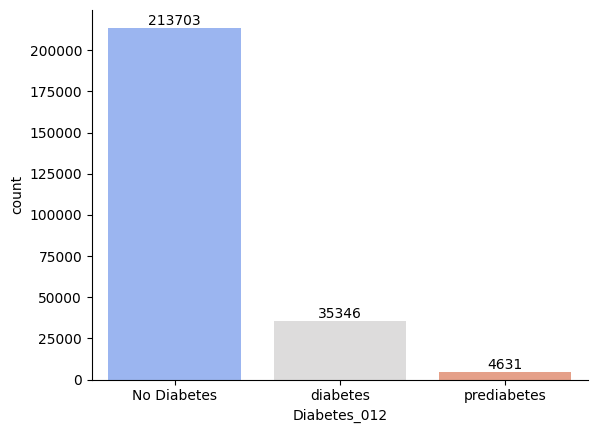

In [72]:
ax = sns.countplot(eda, x='Diabetes_012', palette='coolwarm')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()

as we can see, the dataset is imbalance. We will balance it later with hybrid and oversampling.

## 2. Health Conditions (HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack)

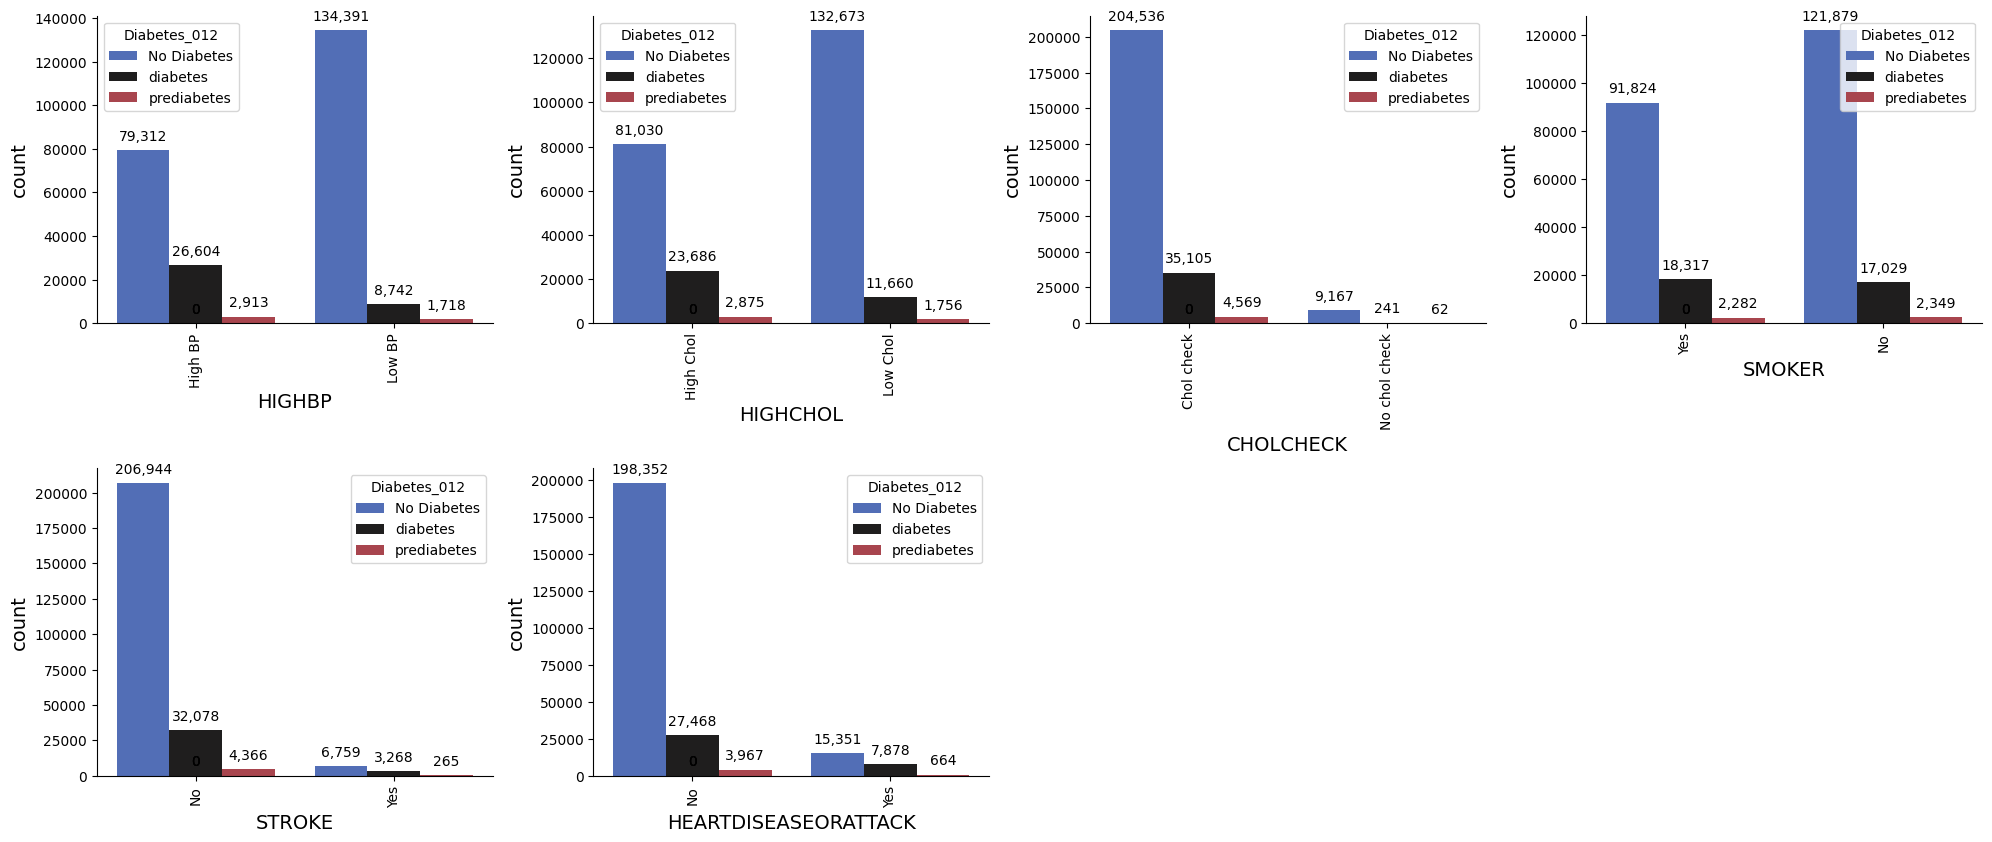

In [73]:
plt.figure(figsize=(20,17))
for index, column in enumerate(eda[["HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack"]].columns):
    plt.subplot(4,4, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

## 3. Lifestyle & Diet (PhysActivity, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, DiffWalk, Fruits, Veggies)

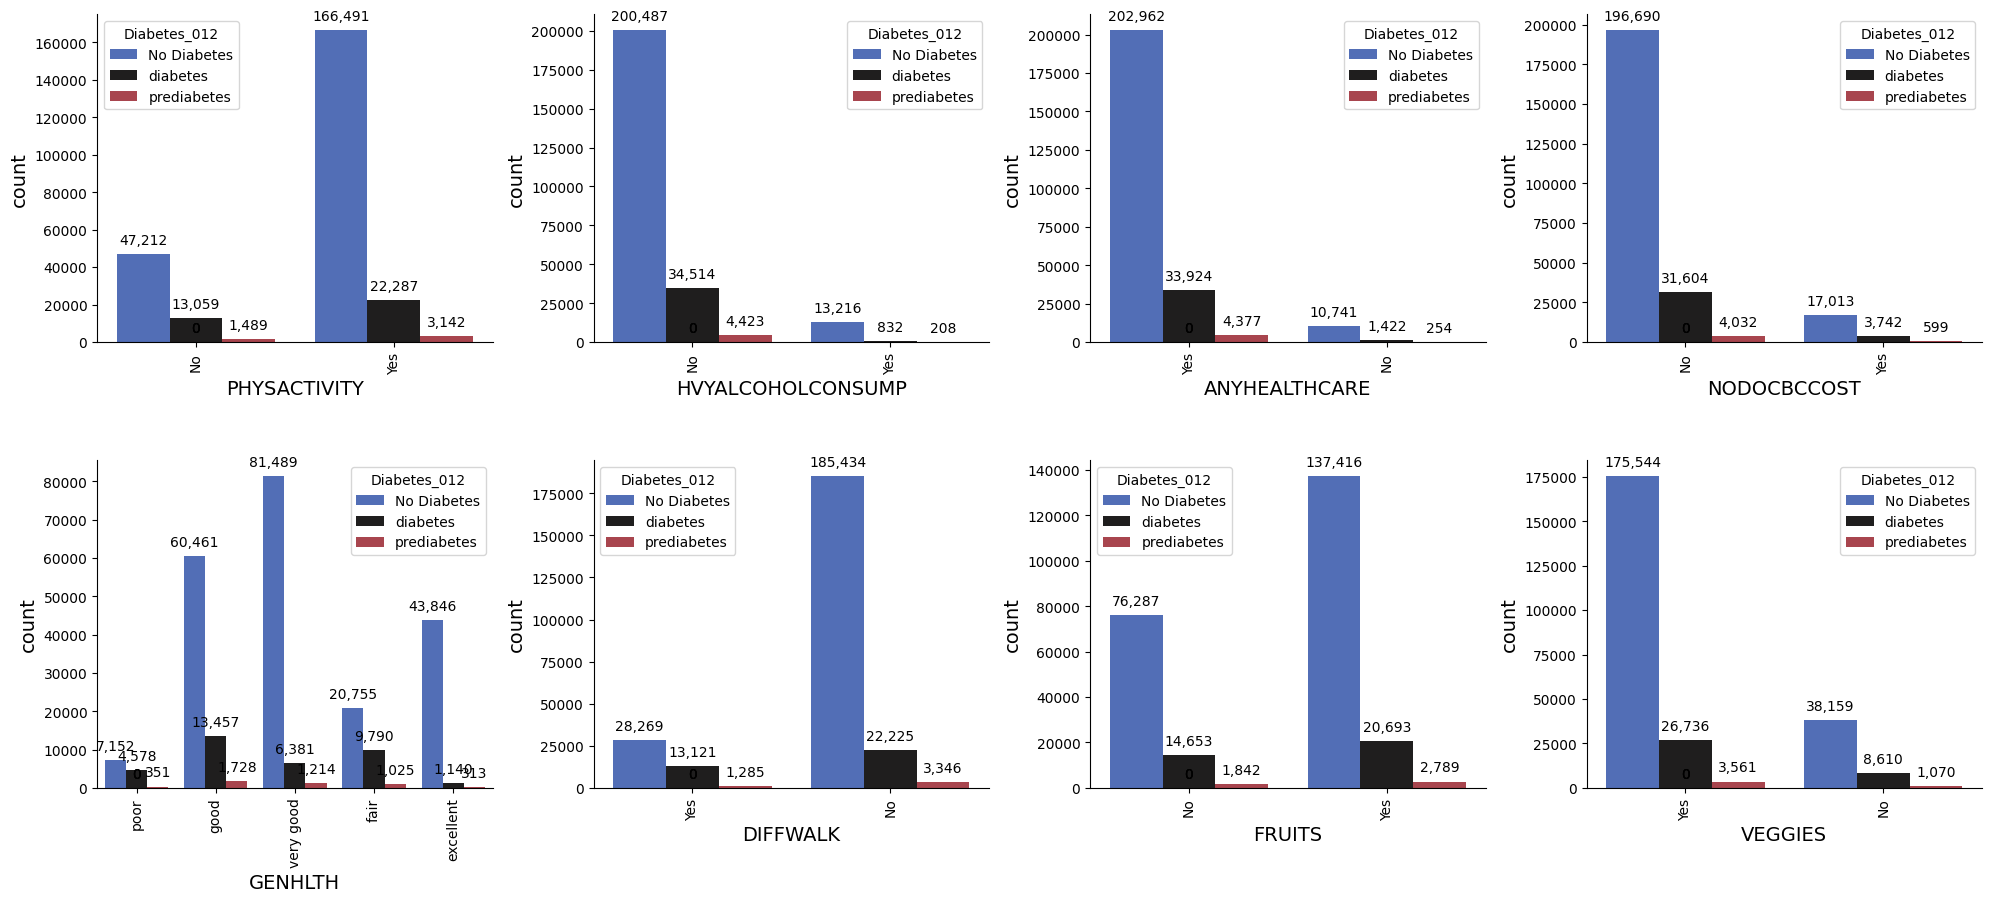

In [74]:
plt.figure(figsize=(20,17))
for index, column in enumerate(eda[["PhysActivity", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk","Fruits", "Veggies"]].columns):
    plt.subplot(4,4, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.tight_layout(pad=1.0)
plt.show()

## 4. Demography (Sex, Age, Education, Income)

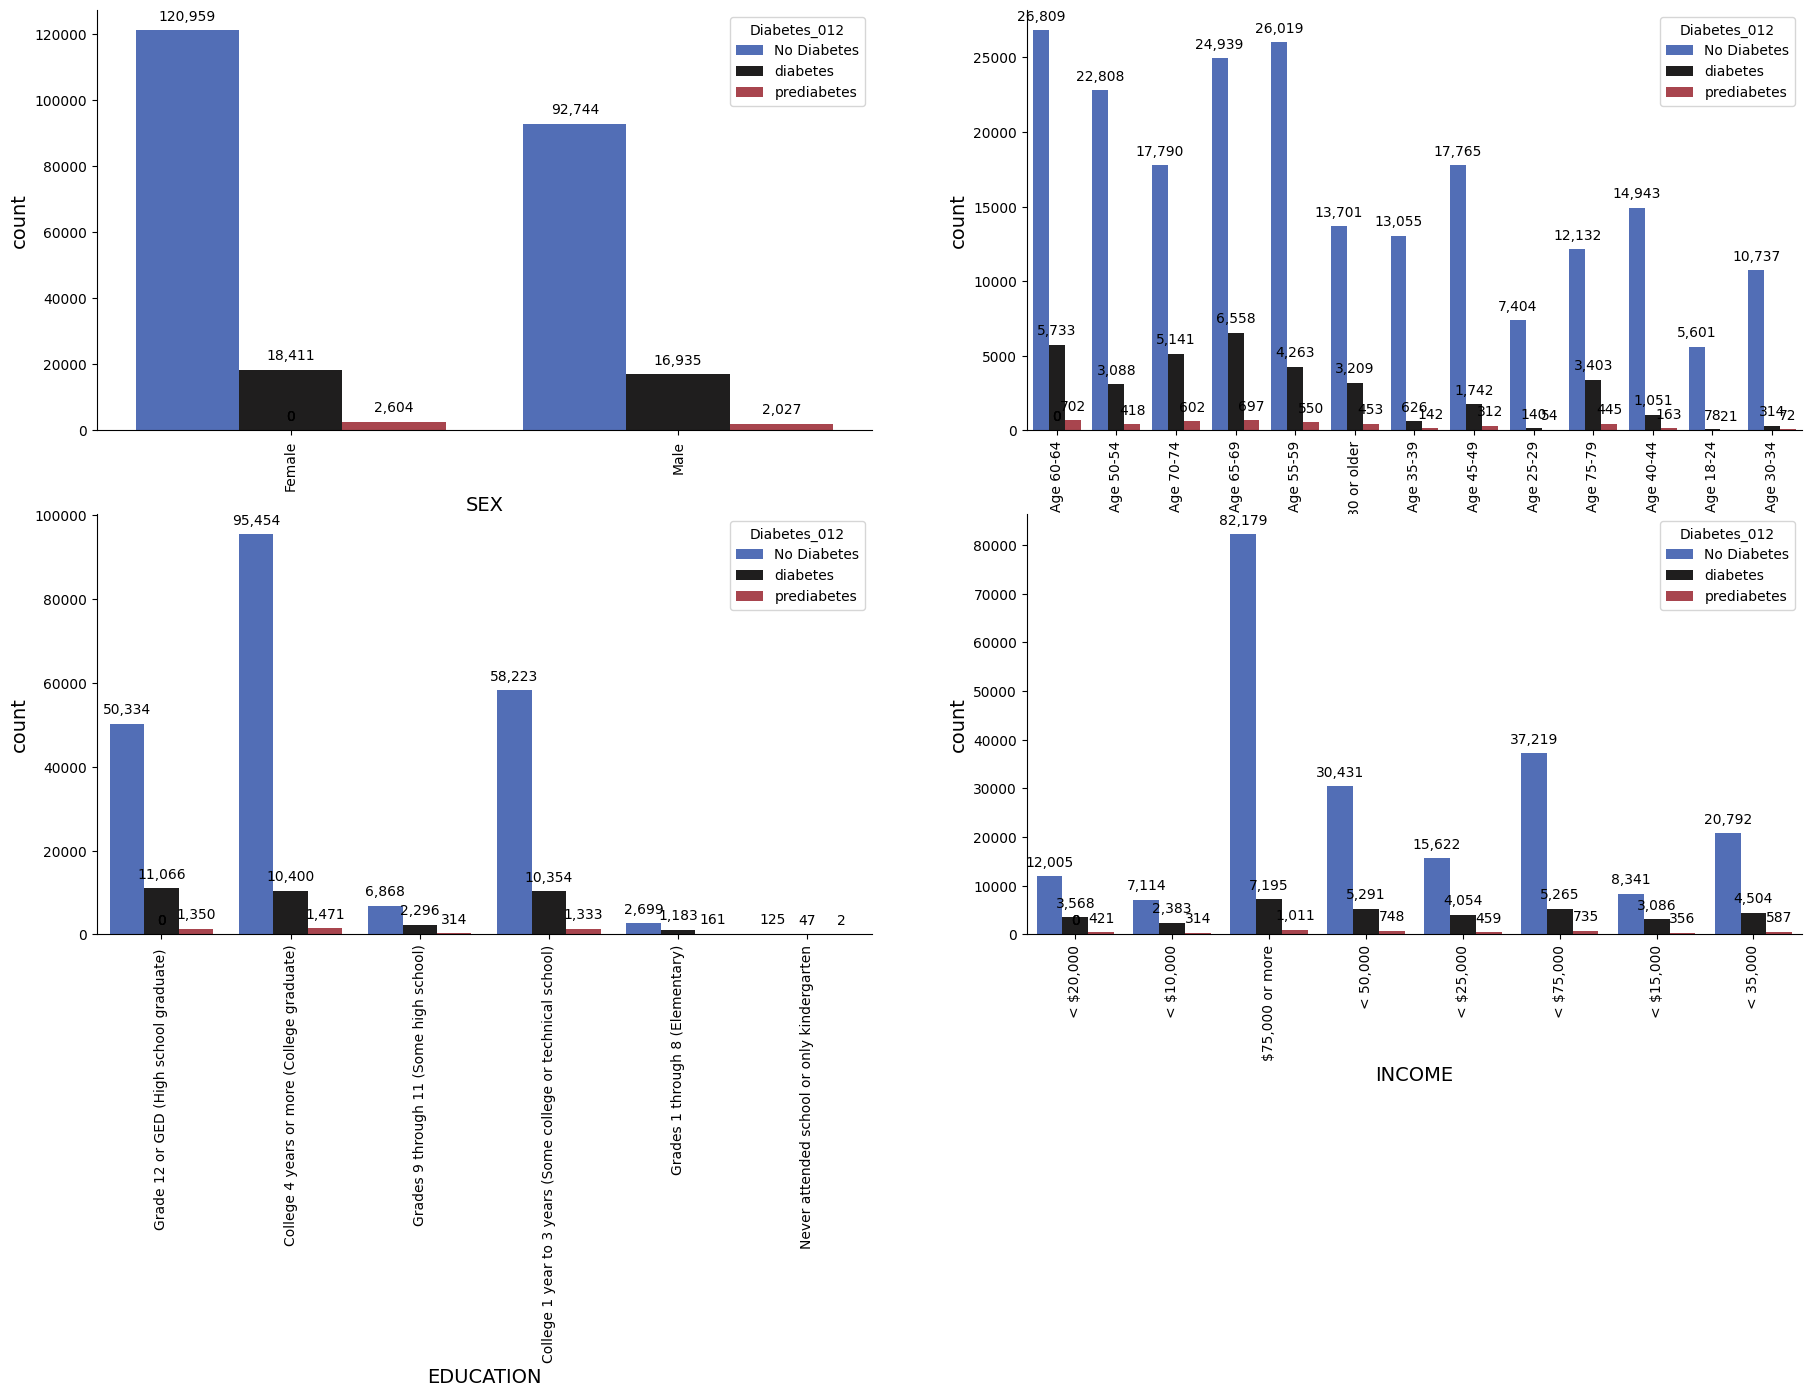

In [75]:
plt.figure(figsize=(22,12))
for index, column in enumerate(eda[["Sex", "Age", "Education", "Income"]].columns):
    plt.subplot(2,2, index + 1)
    ax = sns.countplot(data=eda, x=column, hue='Diabetes_012', palette='icefire')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ',.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')
    sns.despine()
    plt.xticks(rotation=90)
    plt.xlabel(column.upper(), fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.show()

## 5. BMI Distribution and average BMI per diabetes categories

,BMI
Diabetes_012,
0,27.742521
1,30.724466
2,31.944011


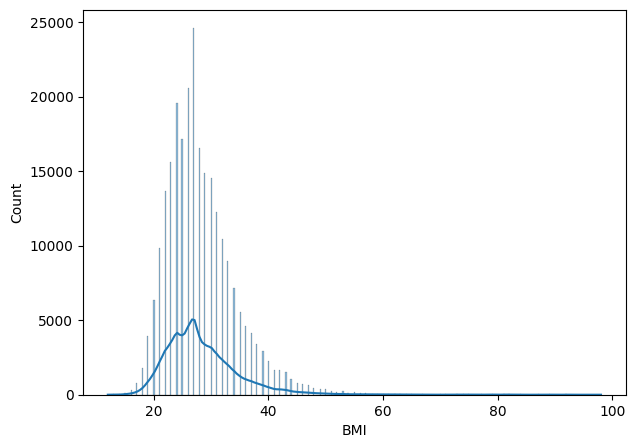

In [76]:
plt.figure(figsize=(7,5))
sns.histplot(data['BMI'], kde=True)
data.groupby("Diabetes_012", group_keys=False)[['BMI']].mean()

In [77]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3 - q1

print("Min value: ", data['BMI'].min())
print("Max value: ", data['BMI'].max())

upper = q3 + 1.5*iqr
lower = q1 - 1.5*iqr

print("Lower value: ", lower)
print("Upper value: ", upper)



Min value:  12
Max value:  98
Lower value:  13.5
Upper value:  41.5


#### getting outliers from BMI column

<Axes: ylabel='BMI'>

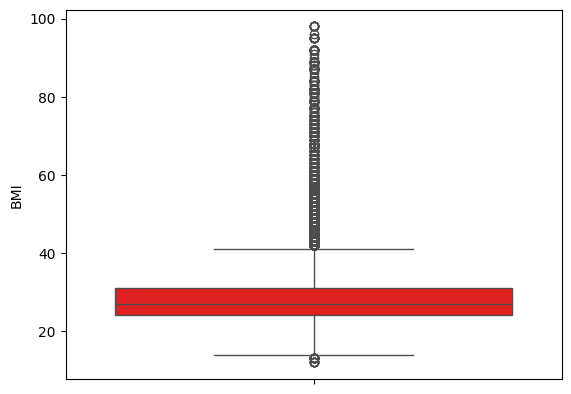

In [78]:
sns.boxplot(data['BMI'],color='red')

In [79]:
data.query('BMI > @ upper')

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,2,1,1,1,45,0,0,0,0,0,...,1,0,4,2,30,1,0,9,6,8
97,0,1,0,1,45,0,0,0,1,1,...,1,0,3,0,0,0,0,9,4,6
156,2,1,1,1,47,1,0,0,0,1,...,1,0,3,0,0,1,0,11,6,5
188,0,1,0,1,43,1,0,0,0,0,...,1,0,4,0,7,1,0,10,5,2
201,2,1,1,1,55,0,0,0,0,1,...,1,0,4,0,15,0,0,11,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253547,0,1,1,1,44,0,0,0,1,1,...,1,1,4,14,30,0,0,3,6,1
253557,0,1,1,1,42,0,0,0,0,0,...,1,0,4,10,20,1,0,6,4,1
253567,0,1,1,1,44,0,0,1,0,1,...,1,1,3,0,0,1,1,11,2,1
253673,0,1,0,1,42,0,0,0,1,1,...,1,0,3,14,4,0,1,3,6,8


based on National Institute of Health, 
The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers. Hence, people with BMI > 40 are experiencing severe risk as listed above.

In [80]:
data[(data['BMI'] >= 50) & (data['BMI'] <= 98)]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
201,2,1,1,1,55,0,0,0,0,1,...,1,0,4,0,15,0,0,11,5,2
658,1,0,0,1,50,1,0,0,1,1,...,1,0,2,3,8,0,0,3,5,6
670,2,1,0,1,59,0,0,0,1,1,...,0,1,3,0,0,0,0,5,6,1
736,0,1,0,1,50,0,0,0,0,0,...,1,0,2,3,3,1,0,10,4,7
758,2,1,1,1,52,1,0,0,1,0,...,1,0,3,0,2,1,1,10,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252714,0,1,1,1,55,0,0,0,0,1,...,1,0,4,0,0,0,1,4,5,1
252819,0,0,0,1,55,1,0,0,1,0,...,1,1,2,5,0,0,0,3,5,1
252844,2,1,0,1,51,0,0,0,0,0,...,1,1,4,0,7,1,0,7,4,5
253316,0,0,0,1,51,1,0,0,1,1,...,1,0,3,0,0,0,0,8,2,1


#### Removing outliers

While the outliers in BMI column are above 41.5, after doing some research on google I found that there are cases of people with BMI ranging from 40 to 60 and over 60, which classified as morbid obesity according to Princeton Health. I did not find any information of cases of people with BMI 70 and over. Hence, I will filter the data to include only BMI under 70.

In [81]:
data = data[data['BMI'] < 70]

### BMI distribution after removing outliers

<Axes: xlabel='BMI', ylabel='Count'>

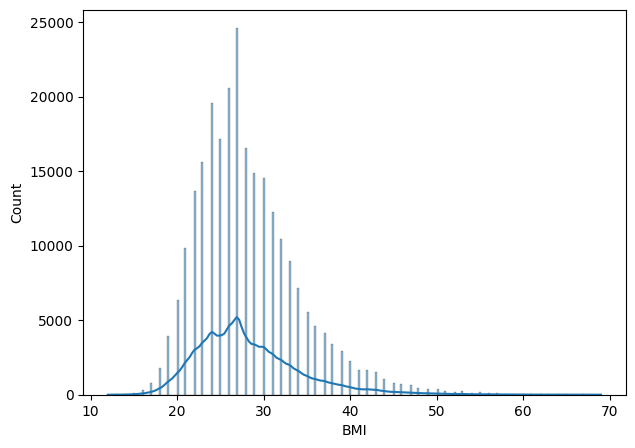

In [82]:
plt.figure(figsize=(7,5))
sns.histplot(data['BMI'], kde=True)

## 6. Age class distribution and diabetes categories per class

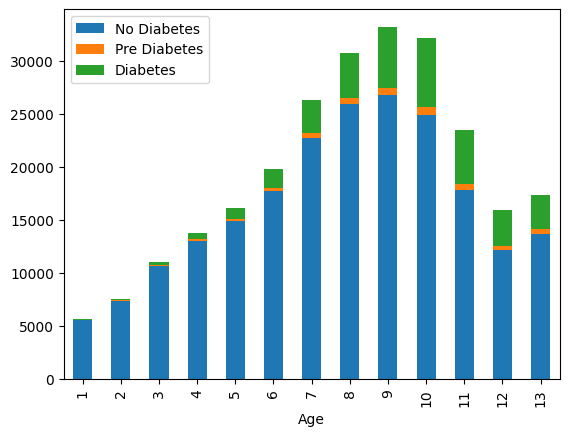

In [83]:
age_diabetes = pd.crosstab(data['Age'], data['Diabetes_012'])
age_diabetes.plot(kind='bar', stacked=True)
plt.legend(['No Diabetes', 'Pre Diabetes', 'Diabetes'])
plt.show()

from this visual we can see that age classes that prone to diabetes are class 8, 9, 10, 11 or from age 55 to 74

## 7. Distribution of physical health and its diabetes categories
How many days patients have physical illness and injury during the past 30 days

C:\Users\DiraAm\AppData\Local\Temp\ipykernel_16412\1140917049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x='PhysHlth', palette='icefire', order = data['PhysHlth'].value_counts().index)


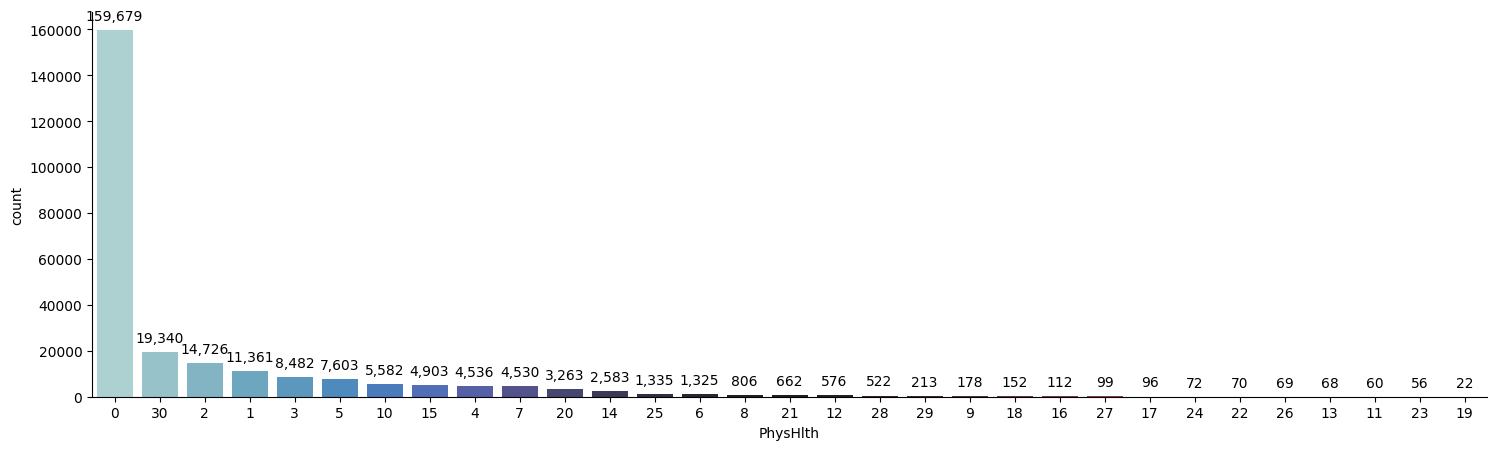

In [84]:
plt.figure(figsize=(18,5))
ax = sns.countplot(data, x='PhysHlth', palette='icefire', order = data['PhysHlth'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center', va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')
sns.despine()

most of the patients do not experience physical injuries, but there are also patients who already experience a month of illness.

## 8. Correlation between features and target

<Axes: >

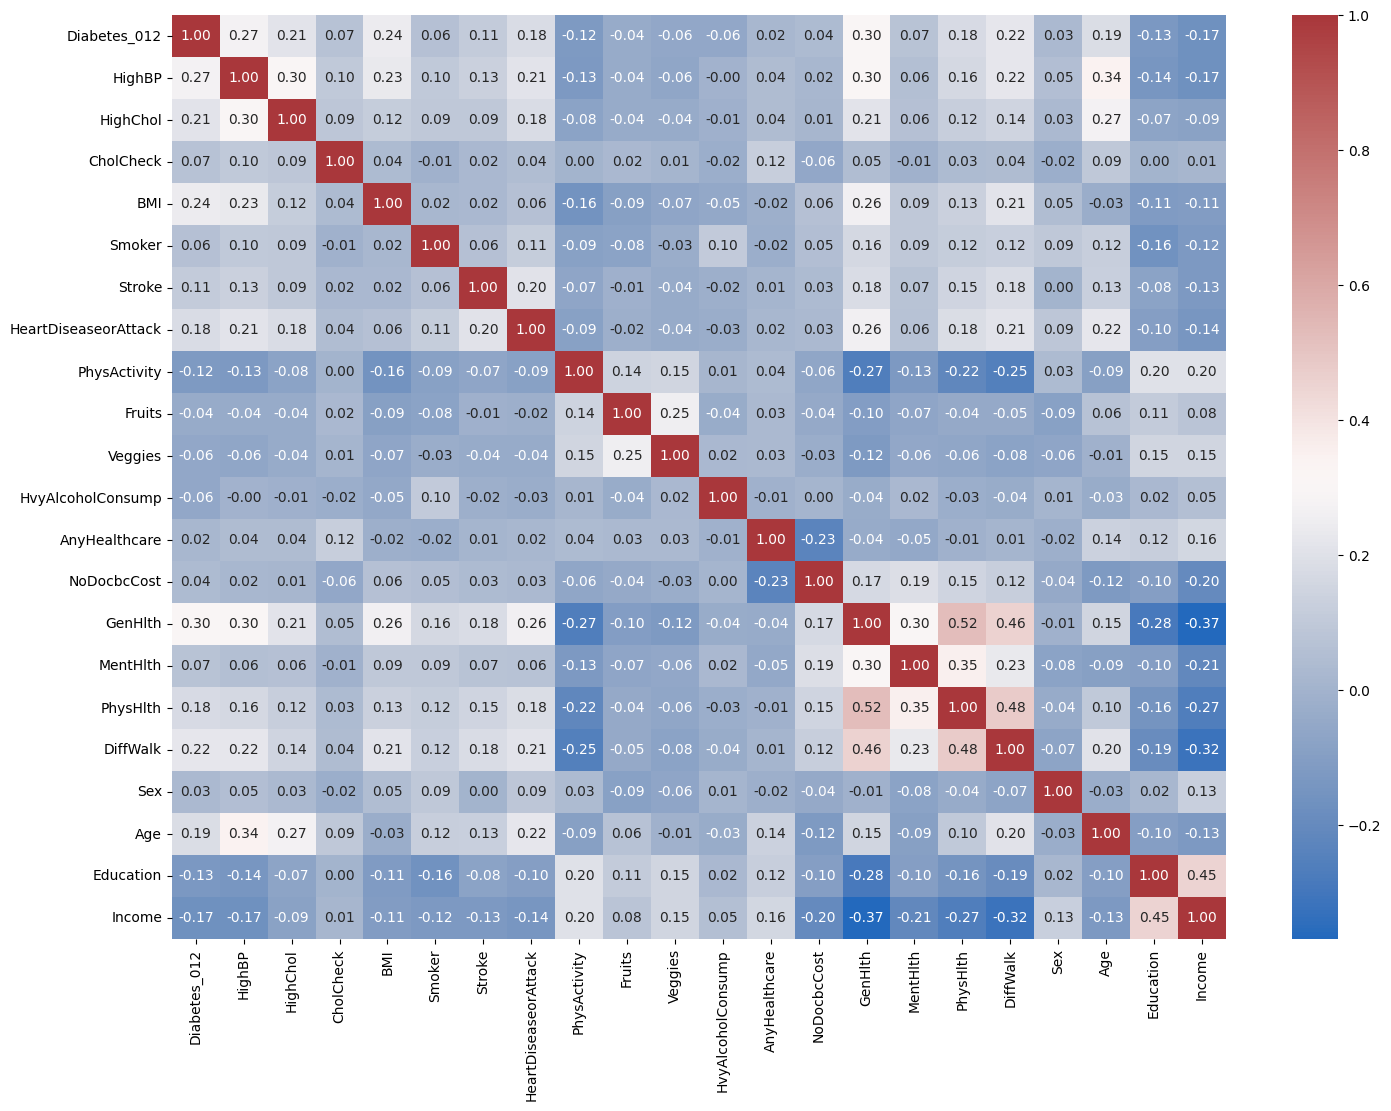

In [85]:
plt.figure(figsize=(17,12))
sns.heatmap(data.corr(),annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f")

### correlation between health condition and diabetes

<Axes: >

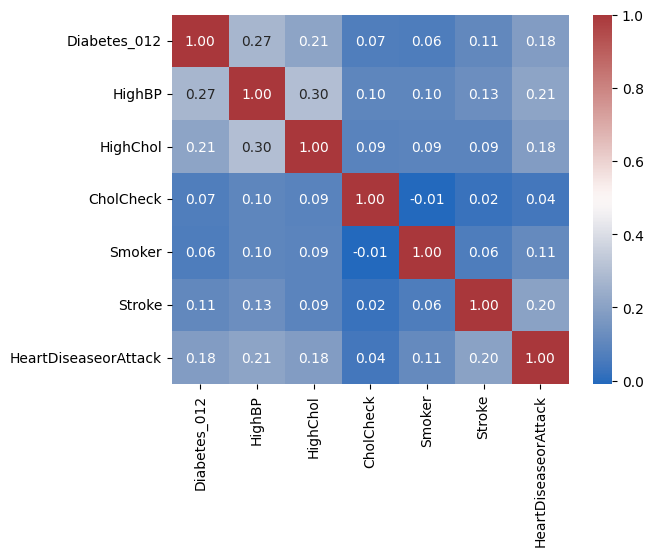

In [86]:
sns.heatmap(data[["Diabetes_012","HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", "HeartDiseaseorAttack"]].corr(),annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f")

**Health condition insights:**

1. High blood pressure, high cholesterol, stroke, and heart disease or attack could contribute to a person diagnosed with diabetes, although the possibilities are small

2. Cholesterol check for the last 5 years and a person being a smoker does not affect the possibility of getting diabetes

3. However, high cholesterol can lead to high blood pressure and vice versa

### correlation between lifestyle & diet and diabetes

<Axes: >

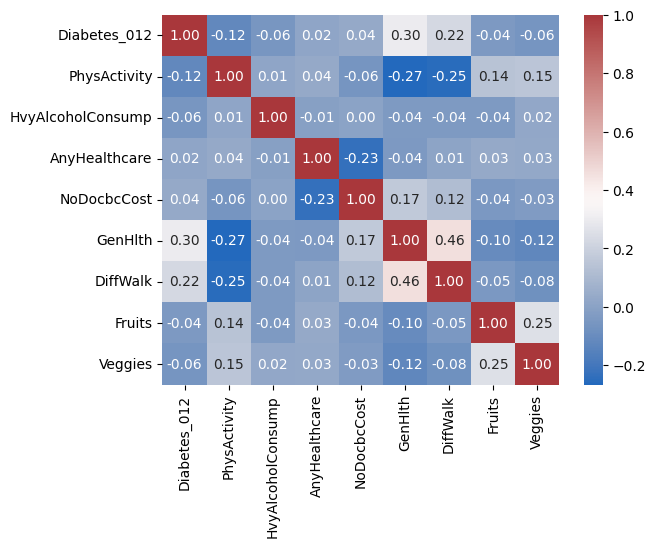

In [87]:
sns.heatmap(data[["Diabetes_012", "PhysActivity", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth", "DiffWalk","Fruits", "Veggies"]].corr(),annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f")

**Lifestyle & Diet**

1. The higher the physical activity, the lesser possibility of a person getting diabetes

2. If a person has poor health condition, and/or experiences serious walking or climbing difficulties, that could lead to diabetes, although the correlation is small

3. Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week), eating fruits and veggies does not affect diabetes condition

4.  Healthcare coverage does not have a correlation to a person getting diabetes or not. However, at some cases, people that don't go to see the doctor because of financial matters don't have health coverage that leads to poor health condition

5. People who have walking or climbing difficulties have higher possibility of having poor health condition

### correlation between demography and diabetes

<Axes: >

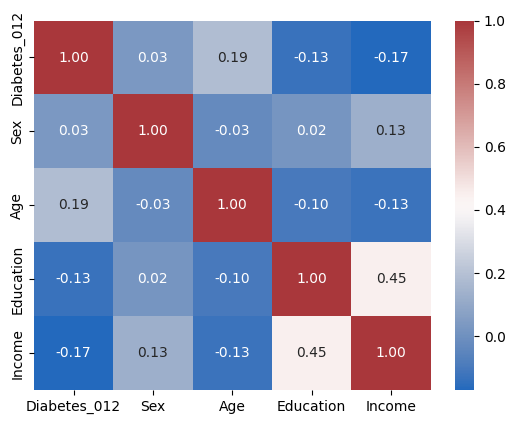

In [88]:
sns.heatmap(data[["Diabetes_012", "Sex", "Age", "Education", "Income"]].corr(),annot=True, cmap=sns.color_palette("vlag", as_cmap=True), fmt=".2f")

**Demography Insights**

1. Sex does not correlates with diabetes, but on previous exploration the majority of people who have diabetes are female

2. The lower the education level, it has a small chance of getting diabetes due to health education and awareness they get. Usually the higher the education level, the higher the awareness

3. People with lower income are more possible to get diabetes, one of the reasons I assume is because of financial matters to get medication.

# Splitting dataset into training and testing

In [89]:
X = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']

In [90]:
y.value_counts()

Diabetes_012
0    213197
2     35265
1      4619
Name: count, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

In [92]:
print("X train row: ", X_train.shape[0])
print("X train cols: ", X_train.shape[1])
print(" ")
print("X test row: ", X_test.shape[0])
print("X test cols: ", X_test.shape[1])

X train row:  177156
X train cols:  21
 
X test row:  75925
X test cols:  21


In [93]:
y_train.value_counts()

Diabetes_012
0    149237
2     24686
1      3233
Name: count, dtype: int64

# Balancing Data

In [94]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
from imblearn.pipeline import Pipeline
from sklearn import preprocessing

In [96]:
oversampler = RandomOverSampler()
X_train_sampled, y_train_sampled = oversampler.fit_resample(X_train, y_train)

undersampler = RandomUnderSampler()
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [97]:
y_train_sampled.value_counts()

Diabetes_012
0    149237
1    149237
2    149237
Name: count, dtype: int64

In [98]:
y_train_under.value_counts()

Diabetes_012
0    3233
1    3233
2    3233
Name: count, dtype: int64

# Feature Scaling

## StandardScaler()

Standard Scaling for Oversample

In [99]:
# define
scaler = preprocessing.StandardScaler()

# fit
scaler.fit(X_train_sampled, y_train_sampled)

# transform
X_train_scaled = scaler.transform(X_train_sampled)
X_test_scaled = scaler.transform(X_test)

Standard Scaling for Undersample

In [100]:
scaler.fit(X_train_under, y_train_under)

# transform
X_train_scaled_under = scaler.transform(X_train_under)
X_test_scaled_under = scaler.transform(X_test)

## MinMaxScaler()

MinMax for Oversample

In [101]:
# define
minmax = preprocessing.MinMaxScaler()

# fit
minmax.fit(X_train_sampled, y_train_sampled)

# transform
X_train_minmax = minmax.transform(X_train_sampled)
X_test_minmax = minmax.transform(X_test)

MinMax for Undersample

In [102]:
minmax.fit(X_train_under, y_train_under)

X_train_minmax_under = minmax.transform(X_train_under)
X_test_minmax_under = minmax.transform(X_test)

# Machine Learning Modeling

## Logistic Regression

In [103]:
def ml_model(model_name, model_method, x_train_method, y_train_method, x_test_method):
  model_name = model_method
  model_name.fit(x_train_method, y_train_method)
  y_pred = model_name.predict(x_test_method)
  print("The test accuracy score is ", accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred))

In [104]:
ml_model('lr', LogisticRegression(multi_class='ovr'), X_train_scaled, y_train_sampled, X_test_scaled)

The test accuracy score is  0.6708594007243991
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     63960
           1       0.03      0.26      0.06      1386
           2       0.35      0.61      0.45     10579

    accuracy                           0.67     75925
   macro avg       0.44      0.52      0.43     75925
weighted avg       0.85      0.67      0.74     75925



In [105]:
ml_model('lr', LogisticRegression(multi_class='ovr'), X_train_scaled_under, y_train_under, X_test_scaled_under)

The test accuracy score is  0.6681330260125123
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     63960
           1       0.03      0.27      0.06      1386
           2       0.35      0.61      0.45     10579

    accuracy                           0.67     75925
   macro avg       0.44      0.52      0.43     75925
weighted avg       0.85      0.67      0.73     75925



## Random Forest

In [106]:
ml_model('rfc', RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10), X_train_scaled_under, y_train_under, X_test_scaled_under)

The test accuracy score is  0.6348501810997695
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     63960
           1       0.03      0.26      0.05      1386
           2       0.33      0.62      0.43     10579

    accuracy                           0.63     75925
   macro avg       0.44      0.51      0.42     75925
weighted avg       0.85      0.63      0.71     75925



In [107]:
ml_model('rfc', RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=10), X_train_scaled, y_train_sampled, X_test_scaled)

The test accuracy score is  0.6422258808034245
              precision    recall  f1-score   support

           0       0.95      0.65      0.77     63960
           1       0.03      0.23      0.05      1386
           2       0.33      0.65      0.44     10579

    accuracy                           0.64     75925
   macro avg       0.44      0.51      0.42     75925
weighted avg       0.85      0.64      0.71     75925



## XGBoost

In [108]:
ml_model('xgb', XGBClassifier(), X_train_scaled_under, y_train_under, X_test_scaled_under)

The test accuracy score is  0.5722094171880144
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     63960
           1       0.03      0.37      0.05      1386
           2       0.32      0.53      0.39     10579

    accuracy                           0.57     75925
   macro avg       0.43      0.49      0.39     75925
weighted avg       0.85      0.57      0.67     75925



In [109]:
ml_model('xgb', XGBClassifier(), X_train_scaled, y_train_sampled, X_test_scaled)

The test accuracy score is  0.6530128416200197
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     63960
           1       0.03      0.23      0.05      1386
           2       0.33      0.64      0.44     10579

    accuracy                           0.65     75925
   macro avg       0.44      0.51      0.42     75925
weighted avg       0.85      0.65      0.72     75925



## KNN

In [110]:
ml_model('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean'), X_train_scaled, y_train_sampled, X_test_scaled)

The test accuracy score is  0.689390846229832
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     63960
           1       0.02      0.05      0.03      1386
           2       0.27      0.57      0.37     10579

    accuracy                           0.69     75925
   macro avg       0.40      0.45      0.40     75925
weighted avg       0.80      0.69      0.73     75925



In [111]:
ml_model('knn', KNeighborsClassifier(n_neighbors=5, metric='euclidean'), X_train_scaled_under, y_train_under, X_test_scaled_under)

The test accuracy score is  0.5827329601580508
              precision    recall  f1-score   support

           0       0.93      0.62      0.74     63960
           1       0.03      0.36      0.05      1386
           2       0.31      0.38      0.34     10579

    accuracy                           0.58     75925
   macro avg       0.42      0.45      0.38     75925
weighted avg       0.82      0.58      0.67     75925



## MLP

In [112]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled_under, y_train_under)
y_pred = mlp.predict(X_test_scaled_under)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     63960
           1       0.03      0.37      0.05      1386
           2       0.31      0.52      0.39     10579

    accuracy                           0.56     75925
   macro avg       0.43      0.49      0.39     75925
weighted avg       0.85      0.56      0.66     75925



c:\Users\DiraAm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [113]:
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train_sampled)
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75     63960
           1       0.03      0.25      0.05      1386
           2       0.31      0.60      0.41     10579

    accuracy                           0.61     75925
   macro avg       0.43      0.49      0.40     75925
weighted avg       0.85      0.61      0.69     75925



## Naive Bayes

In [114]:
from sklearn.naive_bayes import (
    CategoricalNB, # fiturnya kategorikal semua, tapi diubah ke angka dulu / encoding
    GaussianNB, # fitur numerik, terdistribusi normal (gaussian)
    MultinomialNB, # fitur numerik, distribusi multinomial -> distribusinya normal tapi gak continuous, ada gap dari satu data point ke yang lain
    ComplementNB, # distribusi data tiap fitur beda2
    BernoulliNB
    )

In [115]:
ml_model('gnb', GaussianNB(), X_train_scaled_under, y_train_under, X_test_scaled_under)

The test accuracy score is  0.6846229832071122
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     63960
           1       0.03      0.12      0.05      1386
           2       0.31      0.66      0.42     10579

    accuracy                           0.68     75925
   macro avg       0.42      0.49      0.42     75925
weighted avg       0.83      0.68      0.73     75925



In [116]:
ml_model('gnb', GaussianNB(), X_train_scaled, y_train_sampled, X_test_scaled)

The test accuracy score is  0.6846098123147843
              precision    recall  f1-score   support

           0       0.93      0.70      0.80     63960
           1       0.03      0.12      0.05      1386
           2       0.32      0.66      0.43     10579

    accuracy                           0.68     75925
   macro avg       0.43      0.49      0.42     75925
weighted avg       0.83      0.68      0.73     75925



In [117]:
ml_model('cnb', CategoricalNB(), X_train_minmax, y_train_sampled, X_test_minmax)

The test accuracy score is  0.6505630556470201
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     63960
           1       0.03      0.25      0.05      1386
           2       0.33      0.52      0.41     10579

    accuracy                           0.65     75925
   macro avg       0.43      0.49      0.41     75925
weighted avg       0.83      0.65      0.72     75925



In [118]:
ml_model('cnb', CategoricalNB(), X_train_minmax_under, y_train_under, X_test_minmax_under)

The test accuracy score is  0.6516957523872242
              precision    recall  f1-score   support

           0       0.93      0.68      0.79     63960
           1       0.03      0.24      0.05      1386
           2       0.33      0.53      0.41     10579

    accuracy                           0.65     75925
   macro avg       0.43      0.48      0.41     75925
weighted avg       0.83      0.65      0.72     75925



# Model Evaluation

In [119]:
from sklearn.multiclass import OneVsRestClassifier

In [120]:
def check_auc_roc(model_method, x_train_method, y_train_method, x_test_method):
  model = OneVsRestClassifier(model_method).fit(x_train_method, y_train_method)
  prob_test_vec = model.predict_proba(x_test_method)
  n_classes = 3
  fpr = [0] * 3
  tpr = [0] * 3
  thresholds = [0] * 3
  auc_score = [0] * 3
  y_test_binarized = preprocessing.label_binarize(y_test, classes=[0, 1, 2])
  for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_binarized[:, i],prob_test_vec[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])
  print(auc_score)
  return sum(auc_score) / n_classes

In [121]:
check_auc_roc(XGBClassifier(), X_train_scaled, y_train_sampled, X_test_scaled)

[0.8129699036197666, 0.6106519153313449, 0.8121595458360203]


0.7452604549290439

In [122]:
check_auc_roc(XGBClassifier(), X_train_scaled_under, y_train_under, X_test_scaled_under)

[0.7894303683586195, 0.6196662314567035, 0.7817101988424531]


0.7302689328859254

In [123]:
check_auc_roc(MLPClassifier(), X_train_scaled, y_train_sampled, X_test_scaled)

[0.7978566753353733, 0.5837289637951036, 0.7895806685713866]


0.7237221025672879